In [1]:
# Importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting color and pallete for graphs and charts
sns.set_palette("Blues_d")
sns.set_style("darkgrid")

In [3]:
# Reading data
lead = pd.read_csv("Leads.csv")

# Exploring Dataset

In [4]:
# Displaying columns
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Displaying first 5 rows
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Getting number of rows and columns
lead.shape

(9240, 37)

In [7]:
# Checking if there are duplicate rows in the data frame
lead.drop_duplicates(subset=None).shape

(9240, 37)

In [8]:
# Getting rid of Prospect ID and Lead number since they can not help with the classification process
# The inplace term overwrites current data frame
lead.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [9]:
# Display summary information
# Object types will be categorical
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [10]:
# The term select in the data represenets where the user was supposed to make a selection
# It is better to replace this data with null values
lead = lead.replace("Select", np.nan)

In [11]:
# Counting the amount of null cells in each column
lead.isnull().sum(axis=0)

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
len(lead.index)

9240

In [13]:
# Printings the percentage of null vals in each column
round((lead.isnull().sum(axis = 0)/len(lead.index)) * 100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
# Dropping the columns that have a high null percentage, since they will not help
lead.drop(['How did you hear about X Education', 'Lead Profile'], axis = 1, inplace = True)

In [15]:
# Counting the number of unique values that each column has
for col in lead.columns:
    print(col, lead[col].nunique())
    print("\n")

Lead Origin 5


Lead Source 21


Do Not Email 2


Do Not Call 2


Converted 2


TotalVisits 41


Total Time Spent on Website 1731


Page Views Per Visit 114


Last Activity 17


Country 38


Specialization 18


What is your current occupation 6


What matters most to you in choosing a course 3


Search 2


Magazine 1


Newspaper Article 2


X Education Forums 2


Newspaper 2


Digital Advertisement 2


Through Recommendations 2


Receive More Updates About Our Courses 1


Tags 26


Lead Quality 5


Update me on Supply Chain Content 1


Get updates on DM Content 1


City 6


Asymmetrique Activity Index 3


Asymmetrique Profile Index 3


Asymmetrique Activity Score 12


Asymmetrique Profile Score 10


I agree to pay the amount through cheque 1


A free copy of Mastering The Interview 2


Last Notable Activity 16




In [16]:
# Columns that only have one unique value can not help the learning process 
# These should be dropped
lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [17]:
# Displaying all columns
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [18]:
# Calculate the percentage of missing cells in each column again
round((lead.isnull().sum(axis=0)/len(lead.index))*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Examining Remaining Columns 1 by 1

In [19]:
# Displaying the number of each unique entry in Lead Origin
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

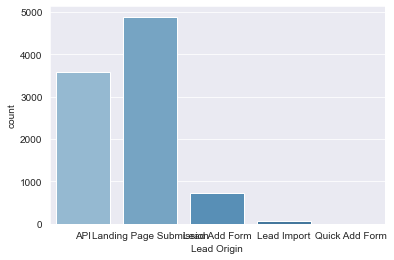

In [20]:
# Showing the distribution of lead origin
sns.countplot(x='Lead Origin', data = lead)

In [21]:
# Displaying the number of unique entry in Lead Source
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
blog                    1
welearnblog_Home        1
testone                 1
WeLearn                 1
Name: Lead Source, dtype: int64

In [22]:
# Google and google should be the same value
lead['Lead Source'].replace(['google'], 'Google', inplace = True)

In [23]:
# Checking counts again
lead['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
welearnblog_Home        1
testone                 1
WeLearn                 1
Name: Lead Source, dtype: int64

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

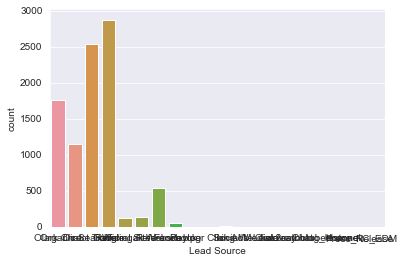

In [24]:
sns.countplot(x='Lead Source', data = lead)

In [25]:
# Merging values with very low occurence into one 'other' value
vals_to_replace = ['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 'youtubechannel', 'Pay per Click Ads', 'WeLearn', 'NC_EDM', 'blog', 'testone','welearnblog_Home']
lead['Lead Source'].replace(vals_to_replace, 'Other', inplace=True)

In [26]:
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other                 23
Name: Lead Source, dtype: int64

In [27]:
# Displaying rows with missing cells in Lead Source
lead[lead['Lead Source'].isnull()]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
836,Lead Add Form,NaN,Yes,No,1,NaN,1378,NaN,Email Bounced,NaN,...,No,NaN,NaN,NaN,02.Medium,02.Medium,14.0,16.0,No,Modified
1569,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,...,No,Will revert after reading the email,Might be,NaN,02.Medium,02.Medium,14.0,16.0,No,SMS Sent
1746,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,...,No,NaN,NaN,NaN,02.Medium,02.Medium,15.0,16.0,No,Modified
2020,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,...,No,NaN,NaN,NaN,02.Medium,02.Medium,15.0,16.0,No,SMS Sent
2025,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,...,No,Will revert after reading the email,Might be,NaN,02.Medium,02.Medium,15.0,16.0,No,SMS Sent
2152,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,...,No,NaN,NaN,NaN,02.Medium,02.Medium,14.0,16.0,No,SMS Sent
2346,Lead Add Form,NaN,Yes,No,1,0.0,0,0.0,SMS Sent,NaN,...,No,Will revert after reading the email,Might be,NaN,02.Medium,02.Medium,14.0,16.0,No,SMS Sent
2544,Lead Import,NaN,No,No,0,0.0,0,0.0,Email Opened,NaN,...,No,number not provided,Not Sure,NaN,02.Medium,02.Medium,14.0,15.0,No,Email Opened
2601,Quick Add Form,NaN,Yes,No,1,NaN,2217,NaN,Email Bounced,NaN,...,No,NaN,NaN,Other Metro Cities,02.Medium,02.Medium,14.0,13.0,No,Modified
2676,Lead Add Form,NaN,No,No,1,0.0,0,0.0,SMS Sent,NaN,...,No,Will revert after reading the email,High in Relevance,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,SMS Sent


In [28]:
# Counting the number of rows where lead source is null and lead origin is Lead Add form
sum(lead[lead['Lead Source'].isnull()]['Lead Origin'] == 'Lead Add Form')

33

In [29]:
# Grouping lead source and lead origin
# Source 'Reference' has highest number of 'Lead Add Form' origin
lead.groupby('Lead Source')['Lead Origin'].value_counts()

Lead Source       Lead Origin            
Direct Traffic    Landing Page Submission    2433
                  API                         110
Facebook          Lead Import                  54
                  Landing Page Submission       1
Google            Landing Page Submission    1714
                  API                        1158
                  Lead Add Form                 1
Olark Chat        API                        1753
                  Lead Add Form                 2
Organic Search    Landing Page Submission     698
                  API                         456
Other             Landing Page Submission      12
                  Lead Add Form                 6
                  API                           5
Reference         Lead Add Form               534
Referral Sites    API                          98
                  Landing Page Submission      27
Welingak Website  Lead Add Form               142
Name: Lead Origin, dtype: int64

In [30]:
# Input the missing values 
lead['Lead Source'] =lead['Lead Source'].fillna('Reference')

In [31]:
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            570
Welingak Website     142
Referral Sites       125
Facebook              55
Other                 23
Name: Lead Source, dtype: int64

In [32]:
# Examining the number of unique values in the Do Not email colum
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [33]:
round((8506 / (8506 + 734)), 2)

0.92

In [34]:
# Since the distribution is so heavily skewed to one value it will not be helpful in prediction
lead.drop(['Do Not Email'], axis=1, inplace = True)

In [35]:
# Examining Do not Call values
lead['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [36]:
# Since data so heavily skewed to no drop the colum
lead.drop(['Do Not Call'], axis=1, inplace = True)

In [37]:
# Examining the dependent variable Converted
# 5000 are not converted
# 3561 did make purchase
lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Converted', ylabel='Density'>

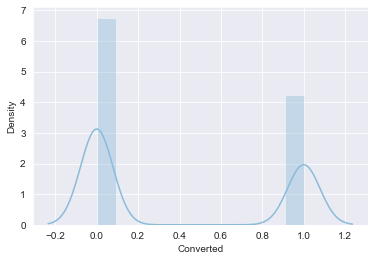

In [38]:
sns.distplot(lead['Converted'])

In [39]:
# Examining total vists and Page views per vist
# Displaying rows with missing Total Visits data
lead[lead['TotalVisits'].isnull()]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
77,Lead Add Form,Welingak Website,1,NaN,1096,NaN,NaN,NaN,NaN,Unemployed,...,No,NaN,NaN,NaN,02.Medium,02.Medium,14.0,15.0,No,Modified
79,Lead Add Form,Reference,1,NaN,705,NaN,NaN,NaN,Hospitality Management,Working Professional,...,No,Will revert after reading the email,Low in Relevance,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,Modified
81,Lead Add Form,Welingak Website,1,NaN,346,NaN,NaN,NaN,NaN,Unemployed,...,No,NaN,NaN,NaN,02.Medium,02.Medium,14.0,15.0,No,Modified
88,Lead Add Form,Reference,1,NaN,1007,NaN,NaN,NaN,Human Resource Management,Unemployed,...,No,Closed by Horizzon,High in Relevance,Mumbai,02.Medium,01.High,14.0,20.0,No,Modified
120,Lead Add Form,Reference,1,NaN,1111,NaN,NaN,NaN,Marketing Management,Working Professional,...,No,Closed by Horizzon,Low in Relevance,Other Cities,02.Medium,01.High,14.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,Lead Add Form,Reference,0,NaN,1201,NaN,NaN,NaN,Marketing Management,Unemployed,...,No,Interested in full time MBA,Not Sure,NaN,02.Medium,01.High,13.0,18.0,No,Modified
8107,Lead Add Form,Reference,1,NaN,903,NaN,NaN,NaN,"Banking, Investment And Insurance",Working Professional,...,No,Lost to EINS,Might be,NaN,02.Medium,01.High,14.0,19.0,No,Modified
8434,Lead Add Form,Reference,1,NaN,1458,NaN,NaN,NaN,NaN,Unemployed,...,No,Closed by Horizzon,High in Relevance,NaN,02.Medium,01.High,14.0,17.0,No,Modified
9015,Lead Add Form,Reference,1,NaN,1159,NaN,NaN,NaN,Supply Chain Management,Working Professional,...,No,Closed by Horizzon,Low in Relevance,Mumbai,02.Medium,01.High,14.0,20.0,No,Modified


In [40]:
# Since these two cols have low percentage of nulls and they having the same subset of entries missing it is best 
# to drop the rows
lead.dropna(subset=['TotalVisits', 'Page Views Per Visit'], inplace = True)

In [41]:
# Examining the number of unique values in total visits column
lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [42]:
# Displaying summary statistics for TotalVisits
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits', ylabel='count'>

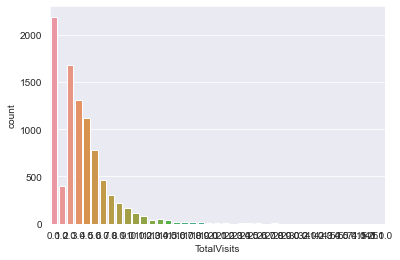

In [43]:
# Showing the count plot for total visits
sns.countplot(x='TotalVisits', data= lead)

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

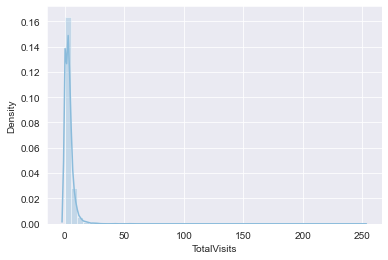

In [44]:
# Showing the distribution of totalvisits
sns.distplot(lead['TotalVisits'])

<AxesSubplot:xlabel='TotalVisits'>

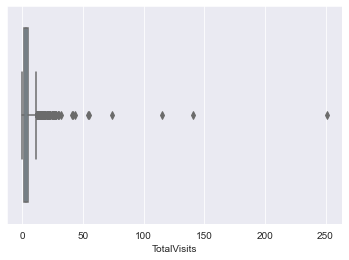

In [45]:
# Showing the boxplot for TotalVisits
sns.boxplot(x=lead['TotalVisits'])

In [46]:
# Examining Outliers in Total Visists
# Percentile based method for range
#Anything below or above are outliers
UB = lead['TotalVisits'].quantile(0.99)
LB = lead['TotalVisits'].quantile(0.01)
LB, UB

(0.0, 17.0)

In [47]:
# Interquartile range method (IQR)
Q3 = lead['TotalVisits'].quantile(0.75)
Q1 = lead['TotalVisits'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
Q1, Q3, IQR, IQR_min, IQR_max

(1.0, 5.0, 4.0, -5.0, 11.0)

In [48]:
# Standard Deviation
# Bounds determined by the mean +- 3 standard deviations
STD = lead['TotalVisits'].std()
STD_UB = lead['TotalVisits'].mean() + 3 * STD
STD_LB = lead['TotalVisits'].mean() - 3 * STD
STD, STD_LB, STD_UB

(4.854852697153968, -11.119320257780698, 18.009795925143106)

In [49]:
# Displaying the rows where TotalVisits is an outlier
lead[(lead['TotalVisits']<min(LB, IQR_min, STD_LB)) | (lead['TotalVisits']> max(UB, IQR_max, STD_UB))]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
345,Landing Page Submission,Organic Search,1,21.0,1113,2.63,Email Opened,India,Operations Management,Unemployed,...,No,Will revert after reading the email,Low in Relevance,Mumbai,02.Medium,01.High,15.0,18.0,Yes,Email Opened
469,Landing Page Submission,Organic Search,0,22.0,59,5.50,Page Visited on Website,India,Human Resource Management,Unemployed,...,No,Ringing,NaN,Mumbai,01.High,01.High,16.0,18.0,Yes,Page Visited on Website
663,Landing Page Submission,Google,1,21.0,1885,3.50,Email Opened,India,Business Administration,Unemployed,...,No,Will revert after reading the email,High in Relevance,Mumbai,01.High,01.High,16.0,20.0,Yes,Email Opened
767,API,Organic Search,0,19.0,415,4.75,Page Visited on Website,India,NaN,NaN,...,No,NaN,NaN,NaN,01.High,02.Medium,18.0,15.0,No,Page Visited on Website
1115,API,Direct Traffic,0,20.0,808,2.86,Email Bounced,India,Supply Chain Management,Unemployed,...,No,Ringing,NaN,Other Cities,02.Medium,02.Medium,15.0,14.0,Yes,Email Bounced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,Landing Page Submission,Google,0,20.0,165,5.00,SMS Sent,India,Human Resource Management,Unemployed,...,No,switched off,Might be,Mumbai,02.Medium,01.High,15.0,18.0,Yes,SMS Sent
8624,Landing Page Submission,Google,1,27.0,573,1.93,Page Visited on Website,India,Business Administration,Unemployed,...,No,Closed by Horizzon,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Page Visited on Website
8684,API,Google,1,23.0,1341,2.09,SMS Sent,India,NaN,NaN,...,No,Lost to EINS,NaN,NaN,01.High,02.Medium,16.0,15.0,No,Modified
8827,Landing Page Submission,Organic Search,0,23.0,194,11.50,Email Opened,India,Finance Management,Unemployed,...,No,Ringing,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,Yes,Email Opened


In [50]:
# Counting the number of outlier value in TotalVisits
(lead['TotalVisits']<min(LB,IQR_min,STD_LB)).sum() + (lead['TotalVisits'] > max(UB, IQR_max,STD_UB)).sum()

68

In [51]:
# Replace all upper outliers with the upper bound of the range - 1 so that
# They are still considered 'high' but do not throw off the model
lead['TotalVisits'].apply(lambda x: lead['TotalVisits'].replace(x, max(UB, IQR_max, STD_UB) - 1, inplace = True) if(x>max(UB, IQR_max, STD_UB)) else x) 

0       0.0
1       5.0
2       2.0
3       1.0
4       2.0
       ... 
9235    8.0
9236    2.0
9237    2.0
9238    3.0
9239    6.0
Name: TotalVisits, Length: 9103, dtype: float64

In [52]:
# Counting the total amount of outliers
(lead['TotalVisits'] > max(UB, IQR_max, STD_UB)).sum()

0

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

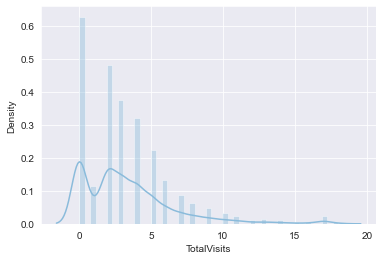

In [53]:
sns.distplot(lead['TotalVisits'])

In [54]:
# Looking at unique values in the Page Views Per Visit col
lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

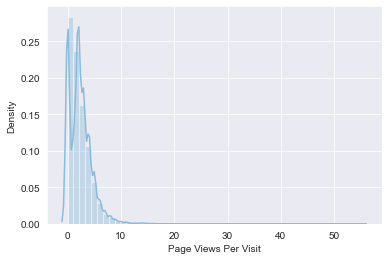

In [55]:
# Showing the distribution of Page views per visit
sns.distplot(lead['Page Views Per Visit'])

In [56]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [57]:
# There are outliers so we need to adjust
# Percentile
UB = lead['Page Views Per Visit'].quantile(.99)
LB = lead['Page Views Per Visit'].quantile(0.01)
LB, UB

(0.0, 9.0)

In [58]:
# IQR Method
Q3 = lead['Page Views Per Visit'].quantile(0.75)
Q1 = lead['Page Views Per Visit'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - IQR * 1.5
IQR_max = Q3 + IQR * 1.5
IQR_min, IQR_max

(-2.0, 6.0)

In [59]:
# Standard Deviation Medoth
STD = lead['Page Views Per Visit'].std()
STD_UB = lead['Page Views Per Visit'].mean() + 3*STD
STD_LB = lead['Page Views Per Visit'].mean() - 3*STD
STD_LB, STD_UB

(-4.121433314209806, 8.847073213144224)

In [60]:
# Displaying the rows where Page Views Per Visit is an outlier
lead[(lead['Page Views Per Visit']<min(LB, IQR_min, STD_LB)) | (lead['Page Views Per Visit']> max(UB, IQR_max, STD_UB))]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
12,API,Organic Search,1,11.000000,1538,11.0,Email Opened,India,Marketing Management,Unemployed,...,No,Will revert after reading the email,Might be,NaN,01.High,02.Medium,16.0,16.0,No,Modified
56,Landing Page Submission,Referral Sites,1,13.000000,436,13.0,Form Submitted on Website,India,IT Projects Management,Unemployed,...,No,Busy,Low in Relevance,Other Metro Cities,02.Medium,02.Medium,15.0,13.0,No,Modified
125,API,Referral Sites,0,16.000000,53,16.0,Olark Chat Conversation,India,NaN,NaN,...,No,NaN,NaN,NaN,02.Medium,02.Medium,15.0,13.0,No,Modified
168,Landing Page Submission,Referral Sites,0,12.000000,493,12.0,Email Link Clicked,India,Marketing Management,NaN,...,No,NaN,NaN,Thane & Outskirts,01.High,02.Medium,16.0,16.0,Yes,Email Link Clicked
246,API,Referral Sites,0,14.000000,354,14.0,Unreachable,India,NaN,Unemployed,...,No,Ringing,Might be,NaN,02.Medium,02.Medium,14.0,13.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8322,Landing Page Submission,Organic Search,1,14.000000,1584,14.0,SMS Sent,India,Travel and Tourism,NaN,...,No,NaN,NaN,Other Cities of Maharashtra,01.High,02.Medium,17.0,15.0,Yes,SMS Sent
8381,Landing Page Submission,Direct Traffic,0,10.000000,793,10.0,Email Opened,NaN,Business Administration,Unemployed,...,No,invalid number,NaN,Other Metro Cities,02.Medium,02.Medium,13.0,16.0,Yes,Email Opened
8640,Landing Page Submission,Organic Search,0,15.000000,1042,15.0,SMS Sent,India,Retail Management,Unemployed,...,No,Ringing,Might be,Mumbai,02.Medium,01.High,15.0,20.0,Yes,SMS Sent
8827,Landing Page Submission,Organic Search,0,17.009796,194,11.5,Email Opened,India,Finance Management,Unemployed,...,No,Ringing,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,Yes,Email Opened


In [61]:
# Replace all upper outliers with the upper bound of the range - 1 so that
# They are still considered 'high' but do not throw off the model
lead['Page Views Per Visit'].apply(lambda x: lead['Page Views Per Visit'].replace(x, max(UB, IQR_max, STD_UB) - 1, inplace = True) if(x>max(UB, IQR_max, STD_UB)) else x) 

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page Views Per Visit, Length: 9103, dtype: float64

In [62]:
# Counting the total amount of outliers
(lead['Page Views Per Visit'] > max(UB, IQR_max, STD_UB)).sum()

0

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

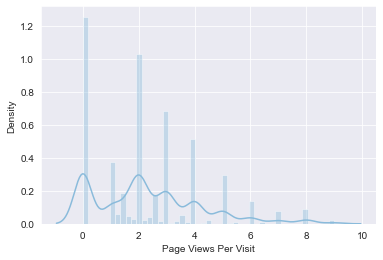

In [63]:
sns.distplot(lead['Page Views Per Visit'])

In [64]:
# Examining Total Time Spent 
# Looking at each value in col
lead['Total Time Spent on Website'].value_counts()

0       2193
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64

/Users/nwenzel/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Time Spent on Website', ylabel='Density'>

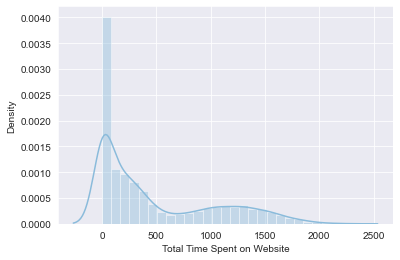

In [65]:
sns.distplot(lead['Total Time Spent on Website'])

In [66]:
lead['Total Time Spent on Website'].describe()

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
25%         9.000000
50%       244.000000
75%       919.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [67]:
lead[lead['Total Time Spent on Website'].isnull()]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity


In [68]:
# Looks like there are outliers
# Percentile Method
UB = lead['Total Time Spent on Website'].quantile(.99)
LB = lead['Total Time Spent on Website'].quantile(0.01)
LB, UB

(0.0, 1838.9599999999991)

In [69]:
# IQR Method
Q3 = lead['Total Time Spent on Website'].quantile(0.75)
Q1 = lead['Total Time Spent on Website'].quantile(0.25)
IQR = Q3 - Q1
IQR_min = Q1 - 1.5*IQR
IQR_max = Q3 + 1.5*IQR
IQR_min, IQR_max

(-1356.75, 2285.25)

In [70]:
# Standard Deviation
STD = lead['Total Time Spent on Website'].std()
STD_UB = lead['Total Time Spent on Website'].mean() + 3*STD
STD_LB = lead['Total Time Spent on Website'].mean() - 3*STD
STD_LB, STD_UB

(-1153.8483212489966, 2116.548529971396)

In [71]:
# Displaying the rows where Page Views Per Visit is an outlier
lead[(lead['Total Time Spent on Website']<min(LB, IQR_min, STD_LB)) | (lead['Total Time Spent on Website']> max(UB, IQR_max, STD_UB))]

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity


In [72]:
# Examining the Last Activiy and Last Notable Activity col
# Looking at the possible value in column
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [73]:
lead[['Last Activity', 'Last Notable Activity']]

,Last Activity,Last Notable Activity
0,Page Visited on Website,Modified
1,Email Opened,Email Opened
2,Email Opened,Email Opened
3,Unreachable,Modified
4,Converted to Lead,Modified
...,...,...
9235,Email Marked Spam,Email Marked Spam
9236,SMS Sent,SMS Sent
9237,SMS Sent,SMS Sent
9238,SMS Sent,SMS Sent


In [74]:
# Since last activity covers all information and better difrentiations we will drop last notable
lead.drop(['Last Notable Activity'], axis = 1, inplace = True)

In [75]:
# Combining Categories with very low counts 
vals_to_replace = ['Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow' ]
lead['Last Activity'] = lead['Last Activity'].replace(vals_to_replace, 'Other Activities')

In [76]:
lead['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   61
Other Activities               42
Name: Last Activity, dtype: int64

In [77]:
# Examining the Country col
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Germany                    4
South Africa               4
Kuwait                     4
Sweden                     3
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Italy                      2
China                      2
Uganda                     2
Netherlands                2
Philippines                2
Belgium                    2
Liberia                    1
Vietnam                    1
Malaysia                   1
Sri Lanka                  1
Indonesia                  1
Switzerland                1
Tanzania      

In [78]:
# Counting the amount of null vals
lead['Country'].isnull().sum(axis=0)

2324

In [79]:
# Since India is a overwhelming majority replace the missing values with inda
lead['Country'] = lead['Country'].fillna('India')

In [80]:
lead['Country'].value_counts()

India                   8816
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
Germany                    4
South Africa               4
Kuwait                     4
Sweden                     3
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Italy                      2
China                      2
Uganda                     2
Netherlands                2
Philippines                2
Belgium                    2
Liberia                    1
Vietnam                    1
Malaysia                   1
Sri Lanka                  1
Indonesia                  1
Switzerland                1
Tanzania      

In [81]:
# Since all other countries have low counts they should be merged
lead['Country'] = lead['Country'].apply(lambda x: 'India' if x=='India' else 'Other')

In [82]:
lead['Country'].value_counts()

India    8816
Other     287
Name: Country, dtype: int64

In [83]:
# Examining the specialization col
lead['Specialization'].value_counts()

Finance Management                   962
Human Resource Management            838
Marketing Management                 824
Operations Management                500
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Travel and Tourism                   202
Media and Advertising                202
International Business               176
Healthcare Management                157
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [84]:
# Counting the amount of null vals
lead['Specialization'].isnull().sum(axis=0)

3304

In [85]:
# This column has 'Select' which was converted to Null so replace these values with other
lead['Specialization'] = lead['Specialization'].fillna('Other')

In [86]:
lead['Specialization'].value_counts()

Other                                3304
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [87]:
# Examining occupation col
lead['What is your current occupation'].value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [88]:
lead['What is your current occupation'].isnull().sum(axis=0)

2683

In [89]:
# Since vast majority is unemployed fill null values with that
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Unemployed')

In [90]:
lead['What is your current occupation'].value_counts()

Unemployed              8185
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [91]:
# Examing what matters most to you 
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [92]:
# No useful data, should be dropped
lead.drop(['What matters most to you in choosing a course'], axis =1, inplace =True)

In [93]:
# Examining the search col
lead['Search'].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [94]:
# No useful data, should be dropped
lead.drop(['Search'],axis = 1, inplace = True)

In [95]:
# Examining newspaper article col
lead['Newspaper Article'].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [96]:
# Not useful data should be dropped
lead.drop(['Newspaper Article'], axis = 1, inplace = True)

In [97]:
# Calculate the percentage of missing cells in each column again
round((lead.isnull().sum(axis=0)/len(lead.index))*100, 2)

Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                    0.00
Specialization                             0.00
What is your current occupation            0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Tags                                      36.61
Lead Quality                              51.95
City                                      39.55
Asymmetrique Activity Index               45.79
Asymmetrique Profile Index                45.79
Asymmetrique Activity Score               45.79
Asymmetrique Profile Score              

In [98]:
# Examining X Education Forms Col
lead['X Education Forums'].value_counts()

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [99]:
# No useful data should be dropped
lead.drop(['X Education Forums'], axis = 1, inplace = True)

In [100]:
# Examining Digital Advertisment col
lead['Digital Advertisement'].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [101]:
# No Useful data here should be dropped
lead.drop(['Digital Advertisement'], axis = 1, inplace =True)

In [102]:
# Examining Through Recomendations
lead['Through Recommendations'].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [103]:
# No Useful Data here, should be dropped
lead.drop(['Through Recommendations'], axis = 1, inplace = True)

In [104]:
# Examining the Tags col
lead['Tags'].value_counts()

Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [105]:
lead['Tags'].isnull().sum(axis=0)

3333

In [106]:
# Since the majority of Tags is "Will revert after reading email" fill null with that
lead['Tags'] = lead['Tags'].fillna('Will revert after reading the email')

In [107]:
lead['Tags'].value_counts()

Will revert after reading the email                  5368
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [108]:
lead['Tags'].isnull().sum(axis=0)

0

In [109]:
to_replace = ['in touch with EINS', 'Lost to Others', 'Still Thinking', 'Want to take admission but has financial problems', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student', 'University not recognized', 'Shall take in the next coming month', 'Recognition issue (DEC approval)']

lead['Tags'].replace(to_replace, 'Other', inplace = True)

In [110]:
lead['Tags'].value_counts()

Will revert after reading the email    5368
Ringing                                1189
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Busy                                    185
Lost to EINS                            173
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Other                                    49
wrong number given                       47
opp hangup                               33
number not provided                      26
Name: Tags, dtype: int64

In [111]:
# Examining Lead Quality
lead['Lead Quality'].value_counts()

Might be             1533
Not Sure             1087
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [112]:
# Since there is a high number of nulls and no clear majority create a new value called 'Unkown'
lead['Lead Quality'].isnull().sum(axis=0)

4729

In [113]:
lead['Lead Quality'] = lead['Lead Quality'].fillna('Unknown')

In [114]:
lead['Lead Quality'].value_counts()

Unknown              4729
Might be             1533
Not Sure             1087
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [115]:
# Examining Newspaper
lead['Newspaper'].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [116]:
# Not helpful
lead.drop(['Newspaper'], axis=1, inplace = True)

In [117]:
# Examining City Col
lead['City'].value_counts()

Mumbai                         3179
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [118]:
lead['City'].isnull().sum(axis=0)

3600

In [119]:
lead['City'] = lead['City'].fillna('Mumbai')

In [120]:
lead['City'].value_counts()

Mumbai                         6779
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [121]:
# Examining Asymmetrique columns
lead[['Asymmetrique Activity Index', 'Asymmetrique Activity Score']]

,Asymmetrique Activity Index,Asymmetrique Activity Score
0,02.Medium,15.0
1,02.Medium,15.0
2,02.Medium,14.0
3,02.Medium,13.0
4,02.Medium,15.0
...,...,...
9235,02.Medium,15.0
9236,02.Medium,14.0
9237,02.Medium,13.0
9238,02.Medium,15.0


In [122]:
# 4 columns represent the same thing so we get rig of three of them
lead.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index'], axis=1, inplace = True)

In [123]:
lead['Asymmetrique Activity Score'].value_counts()

14.0    1712
15.0    1289
13.0     752
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [124]:
sum(lead['Asymmetrique Activity Score'] == 14)/len(lead.index)

0.18806986707678788

In [125]:
# No vast majority and 49% null so this col needs to be dropped
lead.drop(['Asymmetrique Activity Score'],axis=1, inplace =True)

In [126]:
# Examining Asymmetrique profile score
lead['Asymmetrique Profile Score'].value_counts()

15.0    1736
18.0    1066
16.0     594
17.0     568
20.0     298
19.0     224
14.0     220
13.0     198
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [127]:
lead['Asymmetrique Profile Score'].isnull().sum(axis=0)/len(lead.index)

0.4578710315280677

In [128]:
sum(lead['Asymmetrique Profile Score'] == 15)/len(lead.index)

0.19070636054048115

In [129]:
# No majority with 45% null should be dropped
lead.drop(['Asymmetrique Profile Score'],axis=1, inplace = True)

In [130]:
# Examining free copy col
lead['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [131]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview'],
      dtype='object')

In [132]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,Ringing,Unknown,Mumbai,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,Will revert after reading the email,Might be,Mumbai,No


In [133]:
# For supervised learing we need all cols to have numerical vals

Map: A free copy of Mastering the interview

Yes: 1

No: 0

In [134]:
lead['A free copy of Mastering The Interview'] = lead['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [135]:
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,Ringing,Unknown,Mumbai,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,Will revert after reading the email,Might be,Mumbai,0


In [136]:
# Creating dummy variables for categorical vars
cols_to_transform = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'City']
dummy_cols = pd.get_dummies(lead[cols_to_transform], drop_first = True)

In [137]:
dummy_cols.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activities',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Country_Other', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       

In [138]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [139]:
# Adding dummy cols into original data fram
lead = pd.concat([lead, dummy_cols], axis =1)
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Other,Unemployed,...,1,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Other,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Other,Unemployed,...,0,1,0,0,0,0,0,0,0,0


In [140]:
lead[['Lead Origin', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import']]

,Lead Origin,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import
0,API,0,0,0
1,API,0,0,0
2,Landing Page Submission,1,0,0
3,Landing Page Submission,1,0,0
4,Landing Page Submission,1,0,0
...,...,...,...,...
9235,Landing Page Submission,1,0,0
9236,Landing Page Submission,1,0,0
9237,Landing Page Submission,1,0,0
9238,Landing Page Submission,1,0,0


In [141]:
# Drop the non dummy vars
lead.drop(cols_to_transform, axis=1, inplace = True)

In [142]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


# Determing X and Y vars

In [143]:
y = lead['Converted']

In [144]:
# Considering all columns as dependent variables
X = lead.drop(['Converted'],axis=1)

# Feature Scaleing

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
SS = StandardScaler()

In [147]:
# Scale variables that are different than rest of 0-1 data set
X[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = SS.fit_transform(X[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,-1.022932,-0.883153,-1.186715,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.510943,0.353463,0.088904,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.409382,1.927670,-0.166220,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.716157,-0.323557,-0.676467,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.409382,1.736857,-0.676467,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Partition Data

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# Splitting the data such that the test data include 30%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=357)

In [150]:
# Checking the values in our y train set
# If the training set is too imbalance you may need to oversample the data while paritiong 
y_train.value_counts()

0    3958
1    2414
Name: Converted, dtype: int64

# Logistic Regression


In [152]:
from sklearn.linear_model import LogisticRegression

In [155]:
# Creating the logistic resgession object with max iteration at 10000
# If max iteration is too high the model will overfit
LR = LogisticRegression(max_iter=10000)

In [156]:
# Fitting the model to the training data
LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Classification

In [157]:
LR_Pred_Train = LR.predict(X_train)
LR_Pred_Test = LR.predict(X_test)

## Evaluation

In [158]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, LR_Pred_Test))

[[1604   80]
 [ 128  919]]


In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_Pred_Test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1684
           1       0.92      0.88      0.90      1047

    accuracy                           0.92      2731
   macro avg       0.92      0.92      0.92      2731
weighted avg       0.92      0.92      0.92      2731



In [161]:
print(confusion_matrix(y_train, LR_Pred_Train))
print(classification_report(y_train, LR_Pred_Train))

[[3749  209]
 [ 297 2117]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3958
           1       0.91      0.88      0.89      2414

    accuracy                           0.92      6372
   macro avg       0.92      0.91      0.92      6372
weighted avg       0.92      0.92      0.92      6372

